# ATMS 597: Project 5 - Classification

Group D: Joyce Yang, Yang Lu, Lina Rivelli-Zea

Model 1: Logistic Regression classification with default values

UIUC - April, 2020

REFERENCES

Notebook: https://colab.research.google.com/drive/1Zqf6bIHAMROxYaeSTCIAQQmfaDDpPfWp#scrollTo=0kWn-CNvaHUJ

Example: https://www.kaggle.com/akdagmelih/rain-prediction-logistic-regression-example

Book: Chopra R. et. al (2019). Data Science in Python, Chapter 3 (95-133), www.packt.com

In [0]:
pwd

'/data/keeling/a/ler5/python/pyradartutorials/00_introduction'

# Setup the model

In [0]:
# Setup 1
!pip install metpy
!pip install metar

In [0]:
# Setup 2

!pip install scipy
!pip install tensorflow
!pip install keras

In [0]:
# Setup 3
!pip install scikit-image
!pip install netCDF4
!pip install pyproj
!pip install scikit-learn
!pip install opencv-python

In [0]:
# Setup 4
!pip install matplotlib

In [0]:
# Setup 5
!pip install shapely
!pip install geopy
!pip install metpy
!pip install descartes

In [0]:
# Import libraries

%matplotlib inline
import sys
import copy
import warnings
import matplotlib.pyplot as pyplot
import pandas as pd
import io 
import numpy as np
from pandas.tseries.offsets import MonthEnd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import mean_squared_error
from math import sqrt

# Input data into pandas dataframe

Data: KGRB (WI) 5-minute Automated Surface Observation System data available from NCDC 
    
Read 5-min ASOS observations from 2000-2020 data period

In [0]:
#KGRB_precip=pd.read_csv('KGRB_precip.csv')
KGRB_precip=pd.read_csv('/data/keeling/a/ler5/python/pyradartutorials/00_introduction/KGRB_precip.csv')

In [0]:
print(KGRB_precip.columns.values)

['station_id' 'latitude' 'longitude' 'elevation' 'date_time'
 'wind_direction' 'wind_speed' 'current_wx1' 'current_wx2' 'current_wx3'
 'low_cloud_type' 'low_cloud_level' 'medium_cloud_type'
 'medium_cloud_level' 'high_cloud_type' 'high_cloud_level'
 'highest_cloud_type' 'highest_cloud_level' 'cloud_coverage'
 'air_temperature' 'dew_point_temperature' 'altimeter' 'present_weather'
 'past_weather' 'past_weather2' 'air_pressure_at_sea_level'
 'eastward_wind' 'northward_wind']


In [0]:
KGRB_precip

,station_id,latitude,longitude,elevation,date_time,wind_direction,wind_speed,current_wx1,current_wx2,current_wx3,...,cloud_coverage,air_temperature,dew_point_temperature,altimeter,present_weather,past_weather,past_weather2,air_pressure_at_sea_level,eastward_wind,northward_wind
0,KGRB,44.48,-88.13,208.0,2000-01-01 00:00:00,250.0,8.0,-SN,NaN,NaN,...,8,-5.0,-9.0,29.84,71,0,0,NaN,7.517541,2.736161
1,KGRB,44.48,-88.13,208.0,2000-01-01 00:05:00,260.0,8.0,-SN,NaN,NaN,...,8,-5.0,-9.0,29.84,71,0,0,NaN,7.878462,1.389185
2,KGRB,44.48,-88.13,208.0,2000-01-01 00:10:00,260.0,9.0,-SN,NaN,NaN,...,8,-5.0,-9.0,29.84,71,0,0,NaN,8.863270,1.562834
3,KGRB,44.48,-88.13,208.0,2000-01-01 00:15:00,250.0,7.0,-SN,NaN,NaN,...,8,-5.0,-9.0,29.84,71,0,0,NaN,6.577848,2.394141
4,KGRB,44.48,-88.13,208.0,2000-01-01 00:20:00,250.0,8.0,-SN,NaN,NaN,...,8,-5.0,-9.0,29.85,71,0,0,NaN,7.517541,2.736161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162303,KGRB,44.48,-88.13,208.0,2020-03-31 14:10:00,20.0,13.0,-SN,BR,NaN,...,8,1.0,-1.0,30.13,71,10,0,NaN,-4.446262,-12.216004
162304,KGRB,44.48,-88.13,208.0,2020-03-31 14:15:00,20.0,14.0,-SN,BR,NaN,...,8,1.0,-1.0,30.13,71,10,0,NaN,-4.788282,-13.155697
162305,KGRB,44.48,-88.13,208.0,2020-03-31 14:20:00,30.0,13.0,-SN,BR,NaN,...,8,1.0,-1.0,30.13,71,10,0,NaN,-6.500000,-11.258330
162306,KGRB,44.48,-88.13,208.0,2020-03-31 14:25:00,30.0,14.0,-SN,BR,NaN,...,8,1.0,-1.0,30.13,71,10,0,NaN,-7.000000,-12.124356


Read 5-min observations from 1-year data period (for developing code purposes)

In [0]:
precip2000=pd.read_csv('/data/keeling/a/ler5/python/pyradartutorials/00_introduction/df2000.csv')

In [0]:
precip2001=pd.read_csv('/data/keeling/a/ler5/python/pyradartutorials/00_introduction/df2001.csv')

In [0]:
print(precip2000.columns.values)

['station_id' 'latitude' 'longitude' 'elevation' 'date_time'
 'wind_direction' 'wind_speed' 'current_wx1' 'current_wx2' 'current_wx3'
 'low_cloud_type' 'low_cloud_level' 'medium_cloud_type'
 'medium_cloud_level' 'high_cloud_type' 'high_cloud_level'
 'highest_cloud_type' 'highest_cloud_level' 'cloud_coverage'
 'air_temperature' 'dew_point_temperature' 'altimeter' 'present_weather'
 'past_weather' 'past_weather2' 'air_pressure_at_sea_level'
 'eastward_wind' 'northward_wind']


In [0]:
precip2000

,station_id,latitude,longitude,elevation,date_time,wind_direction,wind_speed,current_wx1,current_wx2,current_wx3,...,cloud_coverage,air_temperature,dew_point_temperature,altimeter,present_weather,past_weather,past_weather2,air_pressure_at_sea_level,eastward_wind,northward_wind
0,KGRB,44.48,-88.13,208.0,2000-01-01 00:00:00,250.0,8.0,-SN,NaN,NaN,...,8,-5.0,-9.0,29.84,71,0,0,NaN,7.517541,2.736161
1,KGRB,44.48,-88.13,208.0,2000-01-01 00:05:00,260.0,8.0,-SN,NaN,NaN,...,8,-5.0,-9.0,29.84,71,0,0,NaN,7.878462,1.389185
2,KGRB,44.48,-88.13,208.0,2000-01-01 00:10:00,260.0,9.0,-SN,NaN,NaN,...,8,-5.0,-9.0,29.84,71,0,0,NaN,8.863270,1.562834
3,KGRB,44.48,-88.13,208.0,2000-01-01 00:15:00,250.0,7.0,-SN,NaN,NaN,...,8,-5.0,-9.0,29.84,71,0,0,NaN,6.577848,2.394141
4,KGRB,44.48,-88.13,208.0,2000-01-01 00:20:00,250.0,8.0,-SN,NaN,NaN,...,8,-5.0,-9.0,29.85,71,0,0,NaN,7.517541,2.736161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9741,KGRB,44.48,-88.13,208.0,2000-12-29 18:40:00,30.0,13.0,-SN,BR,NaN,...,8,-5.0,-7.0,30.05,71,10,0,NaN,-6.500000,-11.258330
9742,KGRB,44.48,-88.13,208.0,2000-12-29 18:45:00,30.0,11.0,-SN,BR,NaN,...,8,-5.0,-7.0,30.05,71,10,0,NaN,-5.500000,-9.526279
9743,KGRB,44.48,-88.13,208.0,2000-12-29 18:50:00,30.0,12.0,-SN,BR,NaN,...,8,-5.0,-7.0,30.05,71,10,0,NaN,-6.000000,-10.392305
9744,KGRB,44.48,-88.13,208.0,2000-12-29 18:55:00,30.0,13.0,-SN,BR,NaN,...,8,-5.0,-7.0,30.05,71,10,0,NaN,-6.500000,-11.258330


In [0]:
# Datetime index for csv file
precip2000.index = pd.to_datetime(precip2000.date_time)

Read features of categorical variable for classification

In [0]:
# Multi-class, categorical variable with n-features
levels = len(pd.value_counts(precip2000['current_wx1']))
print('There are {} levels in the current_wx1 column'.format(levels))


There are 10 levels in the current_wx1 column


In [0]:
# Columns of interest in dataframe
precip2=pd.DataFrame()
precip2['wind_speed']=precip2000['wind_speed']
precip2['air_temperature']=precip2000['air_temperature']
precip2['dew_point_temperature']=precip2000['dew_point_temperature']
precip2['eastward_wind']=precip2000['eastward_wind']
precip2['northward_wind']=precip2000['northward_wind']
precip2['present_weather']=precip2000['present_weather']
precip2['current_wx1']=precip2000['current_wx1']

For ASOS observations from 2000-2020 data period

In [0]:
precip1=pd.DataFrame()
precip1['wind_speed']=KGRB_precip['wind_speed']
precip1['air_temperature']=KGRB_precip['air_temperature']
precip1['dew_point_temperature']=KGRB_precip['dew_point_temperature']
precip1['eastward_wind']=KGRB_precip['eastward_wind']
precip1['northward_wind']=KGRB_precip['northward_wind']
precip1['present_weather']=KGRB_precip['present_weather']
precip1['current_wx1']=KGRB_precip['current_wx1']

In [0]:
#precip1['current_wx1']

Targets (Snow, Rain) for Binary Classification

In [0]:
targets = ['SN', 'RA']

# Any word from `targets` are present in sentence.
precip4=KGRB_precip[KGRB_precip.current_wx1.apply(lambda sentence: any(word in sentence for word in targets))]

In [0]:
precip1=pd.DataFrame()
precip1['wind_speed']=precip4['wind_speed']
precip1['air_temperature']=precip4['air_temperature']
precip1['dew_point_temperature']=precip4['dew_point_temperature']
precip1['eastward_wind']=precip4['eastward_wind']
precip1['northward_wind']=precip4['northward_wind']
precip1['present_weather']=precip4['present_weather']
precip1['current_wx1']=precip4['current_wx1']

Drop mixed features (Snow and Rain)

In [0]:
precip1=precip1[precip1.current_wx1 != 'SNRA']

Binarization

In [0]:
precip1['Snow']=precip1.current_wx1.apply(lambda x: 1 if x in ['SN','-SN', '+SN'] else 0)

In [0]:
precip1

,wind_speed,air_temperature,dew_point_temperature,eastward_wind,northward_wind,present_weather,current_wx1,Snow
0,8.0,-5.0,-9.0,7.517541,2.736161,71,-SN,1
1,8.0,-5.0,-9.0,7.878462,1.389185,71,-SN,1
2,9.0,-5.0,-9.0,8.863270,1.562834,71,-SN,1
3,7.0,-5.0,-9.0,6.577848,2.394141,71,-SN,1
4,8.0,-5.0,-9.0,7.517541,2.736161,71,-SN,1
...,...,...,...,...,...,...,...,...
162303,13.0,1.0,-1.0,-4.446262,-12.216004,71,-SN,1
162304,14.0,1.0,-1.0,-4.788282,-13.155697,71,-SN,1
162305,13.0,1.0,-1.0,-6.500000,-11.258330,71,-SN,1
162306,14.0,1.0,-1.0,-7.000000,-12.124356,71,-SN,1


Drop NaN Values 

In [0]:
precip1=precip1.dropna()

In [0]:
precip1

,wind_speed,air_temperature,dew_point_temperature,eastward_wind,northward_wind,present_weather,current_wx1,Snow
0,8.0,-5.0,-9.0,7.517541,2.736161,71,-SN,1
1,8.0,-5.0,-9.0,7.878462,1.389185,71,-SN,1
2,9.0,-5.0,-9.0,8.863270,1.562834,71,-SN,1
3,7.0,-5.0,-9.0,6.577848,2.394141,71,-SN,1
4,8.0,-5.0,-9.0,7.517541,2.736161,71,-SN,1
...,...,...,...,...,...,...,...,...
162303,13.0,1.0,-1.0,-4.446262,-12.216004,71,-SN,1
162304,14.0,1.0,-1.0,-4.788282,-13.155697,71,-SN,1
162305,13.0,1.0,-1.0,-6.500000,-11.258330,71,-SN,1
162306,14.0,1.0,-1.0,-7.000000,-12.124356,71,-SN,1


Final selection of variables for the model 

In [0]:
precip1=precip1.drop(['current_wx1','present_weather'],axis=1)

In [0]:
precip1


,wind_speed,air_temperature,dew_point_temperature,eastward_wind,northward_wind,Snow
0,8.0,-5.0,-9.0,7.517541,2.736161,1
1,8.0,-5.0,-9.0,7.878462,1.389185,1
2,9.0,-5.0,-9.0,8.863270,1.562834,1
3,7.0,-5.0,-9.0,6.577848,2.394141,1
4,8.0,-5.0,-9.0,7.517541,2.736161,1
...,...,...,...,...,...,...
162303,13.0,1.0,-1.0,-4.446262,-12.216004,1
162304,14.0,1.0,-1.0,-4.788282,-13.155697,1
162305,13.0,1.0,-1.0,-6.500000,-11.258330,1
162306,14.0,1.0,-1.0,-7.000000,-12.124356,1


# Setup a logistic regression model

In [0]:
X=precip1.drop('Snow',axis=1)
y= precip1['Snow']

In [0]:
#y

Import configuration of model

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=75)

# For our matrix calculations we need to transpose our matrixis:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

print('x_train shape is: ', x_train.shape)
print('y_train shape is: ', y_train.shape)
print('x_test shape is: ', x_test.shape)
print('y_test shape is: ', y_test.shape)

x_train shape is:  (5, 112768)
y_train shape is:  (112768,)
x_test shape is:  (5, 48330)
y_test shape is:  (48330,)


In [0]:
x_test.shape

(5, 48330)

# Setup Logistic Regression

Instantiate logistic regression

In [0]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train.T,y_train.T)

/data/keeling/a/ler5/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Get the intercept and coefficients

In [0]:
#Get the intercept
intercept = model.intercept_
intercept

array([1.3313994])

In [0]:
# Get the coefficients
coefficients = model.coef_
coefficients

array([[-0.00284918, -0.92701324, -0.4142266 ,  0.0736531 , -0.03197444]])

In [0]:
# Place coefficients into a list
coef_list = list(coefficients[0,:])
coef_list

[-0.002849184970800712,
 -0.9270132445570088,
 -0.414226604899388,
 0.07365309598433661,
 -0.03197443910151106]

In [0]:
# Match features to their coefficients and, place into dataframe
coef_df = pd.DataFrame({'Feature':list(x_train.T.columns), 'Coefficient': coef_list})
print(coef_df)

                 Feature  Coefficient
0             wind_speed    -0.002849
1        air_temperature    -0.927013
2  dew_point_temperature    -0.414227
3          eastward_wind     0.073653
4         northward_wind    -0.031974


Evaluating the performance of model

In [0]:
# Generating predicted probabilities
predicted_prob = model.predict_proba(x_test.T)[:,1]

# Generating predicted classes
predicted_class = model.predict(x_test.T)

#Evaluating performance
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test.T, predicted_class))
cm['Total'] = np.sum(cm, axis=1)
cm = cm.append(np.sum(cm, axis=0), ignore_index=True)
cm.columns = ['Predicted NO SNOW', 'Predicted SNOW', 'Total']
cm = cm.set_index([['Actual NO SNOW', 'Actual SNOW', 'Total']])
print(cm)

                Predicted NO SNOW  Predicted SNOW  Total
Actual NO SNOW              27210            1030  28240
Actual SNOW                   704           19386  20090
Total                       27914           20416  48330


In [0]:
cm

,Predicted NO SNOW,Predicted SNOW,Total
Actual NO SNOW,27210,1030,28240
Actual SNOW,704,19386,20090
Total,27914,20416,48330


In [0]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_test.T, predicted_class))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97     28240
           1       0.95      0.96      0.96     20090

    accuracy                           0.96     48330
   macro avg       0.96      0.96      0.96     48330
weighted avg       0.96      0.96      0.96     48330



In [0]:
from sklearn.metrics import brier_score_loss

# predict probabilities
predicted_prob = model.predict_proba(x_test.T)[:,1]

# calculate bier score
loss = brier_score_loss(y_test.T, predicted_prob)
loss
#predicted_prob.shape
#for i in range(48330):
 #   print((predicted_prob[i]))
    

0.029391815235183246

In [0]:
#for i in range(48330):
 #   print((y_test[i]))
y_test



90288     0
27452     1
55008     1
120683    1
22502     0
41812     1
97918     0
22377     0
55142     0
63185     1
143429    1
19488     1
55768     1
141378    0
22738     0
65810     0
75989     0
119409    1
57021     0
101720    1
30466     0
20322     1
137901    0
134329    1
59188     0
78121     0
78535     0
14320     0
129163    1
155801    0
         ..
34997     1
72114     1
143287    1
32773     1
42022     1
71340     1
155770    0
80330     1
52370     0
36205     0
75696     0
25651     0
87765     1
133992    0
113050    0
127705    1
129547    0
118201    0
97776     0
2677      1
9780      1
54185     0
160890    1
7119      0
65926     0
37770     0
83869     0
74544     0
155335    0
159719    1
Name: Snow, Length: 48330, dtype: int64

In [0]:
predicted_prob


array([[9.86844124e-01, 1.31558758e-02],
       [5.96011934e-04, 9.99403988e-01],
       [4.57086237e-01, 5.42913763e-01],
       ...,
       [9.98260127e-01, 1.73987266e-03],
       [9.99999086e-01, 9.14457593e-07],
       [2.90274139e-01, 7.09725861e-01]])

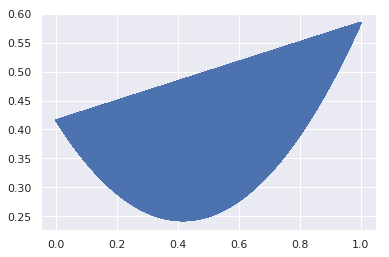

In [0]:
# plot impact of brier for single forecasts
from sklearn.metrics import brier_score_loss
from matplotlib import pyplot
from numpy import array
# predictions as 0 to 1 in 0.01 increments
yhat=model.predict(x_test.T)
# evaluate predictions for a 1 true value
losses = [brier_score_loss(y_test.T, [y for x in range(len(y_test.T))]) for y in predicted_prob]
#losses = [brier_score_loss(y_test.T,predicted_prob)]
# plot input to loss
pyplot.plot(predicted_prob, losses)
pyplot.show()
#losses

In [0]:
predicted_prob_train = model.predict_proba(x_train.T)[:,1]

naive1=sum(predicted_prob)/predicted_prob.shape[0]
naive1 
yhat = [naive1 for _ in range(len(predicted_prob))]
bs_ref= brier_score_loss(y_test.T, yhat)
bs = brier_score_loss(y_test.T, predicted_prob)
bs_skill=1-(bs/bs_ref)

In [0]:
bs_skill

0.8789919924466414

In [0]:
bs_ref

0.24289148982211417

In [0]:
bs

0.029391815235040912

Other logistic regression (SGDClassifier)

In [0]:
from sklearn.linear_model import SGDClassifier
#from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import  mean_squared_error, r2_score
model=SGDClassifier()
#model = LogisticRegression()
model.fit(x_train.T, y_train.T)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

Generating evaluation metrics

In [0]:
predicted = model.predict(x_test.T)

print(metrics.accuracy_score(y_test, predicted))

0.9558038485412788


Another logistic regression (SGDClassifier and CalibratedClassifierCV)

In [0]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(loss='hinge')
calibrated_model = CalibratedClassifierCV(model, cv=5, method='sigmoid')
calibrated_model.fit(x_train.T, y_train.T)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.0001, average=False,
                                                    class_weight=None,
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='hinge', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                      